In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer 
qt=QuantileTransformer(output_distribution='normal',n_quantiles=891)

In [2]:
df=pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#checking and analysing the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# cleaning data
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
df.skew()

C:\Users\vishn\AppData\Local\Temp/ipykernel_912/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -0.147331
dtype: float64

In [13]:
df.skew()

C:\Users\vishn\AppData\Local\Temp/ipykernel_912/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Survived      0.478523
Pclass       -0.630548
Age           0.510245
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Embarked     -0.147331
Age_1        -0.006827
Survived_1    0.478523
Embarked_1   -0.243123
Pclass_sq    -0.444064
Pclass_qt    -0.569343
SibSp_yj      0.808608
SibSp_qt      0.869466
Parch_yj      1.228795
Parch_qt      1.257239
Fare_yj      -0.040329
Fare_qt      -0.928213
dtype: float64

In [15]:

df.skew()

C:\Users\vishn\AppData\Local\Temp/ipykernel_912/2595947365.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Survived      0.478523
Pclass       -0.630548
Age           0.510245
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Embarked     -0.147331
Age_1        -0.006827
Survived_1    0.478523
Embarked_1   -0.243123
Pclass_sq    -0.444064
Pclass_qt    -0.569343
SibSp_yj      0.808608
SibSp_qt      0.869466
Parch_yj      1.228795
Parch_qt      1.257239
Fare_yj      -0.040329
Fare_qt      -0.928213
dtype: float64

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_1,Survived_1,Embarked_1,Pclass_sq,Pclass_qt,SibSp_yj,SibSp_qt,Parch_yj,Parch_qt,Fare_yj,Fare_qt
0,0,3,male,22.0,1,0,7.2500,1.0,-0.695859,-5.199338,0.128501,9,5.199338,0.323389,0.843630,-0.000000,-5.199338,1.906724,-1.373288
1,1,1,female,38.0,1,0,71.2833,0.0,0.823696,5.199338,-5.199338,1,-5.199338,0.323389,0.843630,-0.000000,-5.199338,3.497640,1.202387
2,1,3,female,26.0,0,0,7.9250,1.0,-0.391395,5.199338,0.128501,9,5.199338,-0.000000,-5.199338,-0.000000,-5.199338,1.970459,-0.644732
3,1,1,female,35.0,1,0,53.1000,1.0,0.662165,5.199338,0.128501,1,-5.199338,0.323389,0.843630,-0.000000,-5.199338,3.304258,0.989391
4,0,3,male,35.0,0,0,8.0500,1.0,0.662165,-5.199338,0.128501,9,5.199338,-0.000000,-5.199338,-0.000000,-5.199338,1.981680,-0.537371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1.0,-0.337215,-5.199338,0.128501,4,-0.399008,-0.000000,-5.199338,-0.000000,-5.199338,2.326029,-0.110063
887,1,1,female,19.0,0,0,30.0000,1.0,-0.957723,5.199338,0.128501,1,-5.199338,-0.000000,-5.199338,-0.000000,-5.199338,2.916885,0.624066
888,0,3,female,28.0,1,2,23.4500,1.0,-0.021125,-5.199338,0.128501,9,5.199338,0.323389,0.843630,0.243296,1.539856,2.745246,0.285474
889,1,1,male,26.0,0,0,30.0000,0.0,-0.391395,5.199338,-5.199338,1,-5.199338,-0.000000,-5.199338,-0.000000,-5.199338,2.916885,0.624066


<AxesSubplot:>

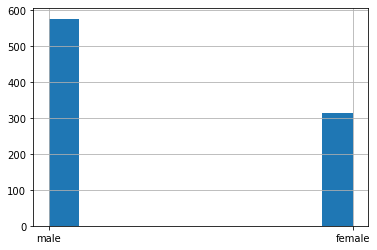

In [17]:

df["Sex"].hist()

<AxesSubplot:>

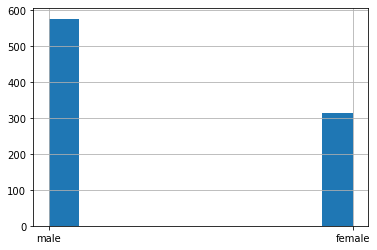

In [19]:
df["Sex_qt"].hist()

<AxesSubplot:>

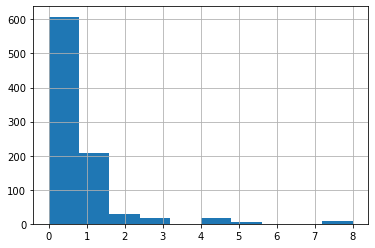

In [20]:
df["SibSp"].hist()

<AxesSubplot:>

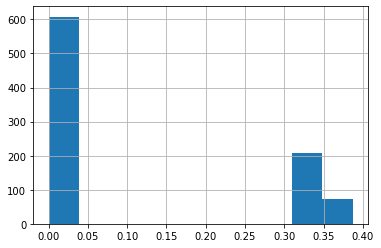

In [21]:
df["SibSp_yj"].hist()

<AxesSubplot:>

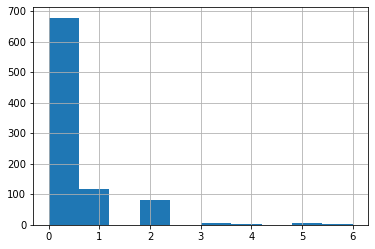

In [22]:
df["Parch"].hist()

<AxesSubplot:>

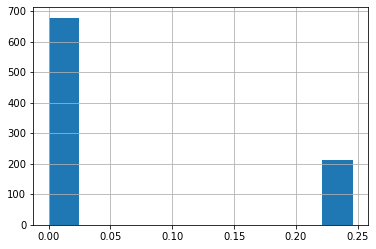

In [23]:
df["Parch_yj"].hist()

<AxesSubplot:>

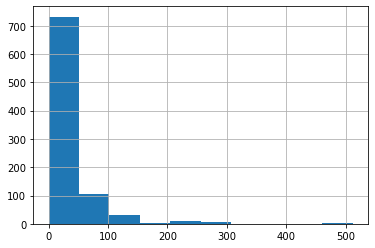

In [24]:
df["Fare"].hist()

<AxesSubplot:>

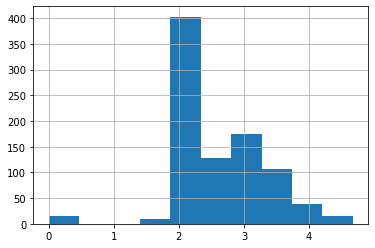

In [25]:
df["Fare_yj"].hist()

<AxesSubplot:>

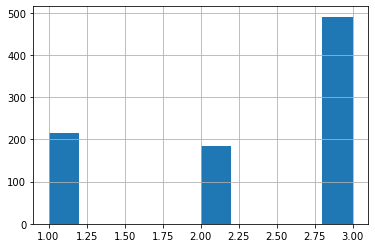

In [26]:
df["Pclass"].hist()

<AxesSubplot:>

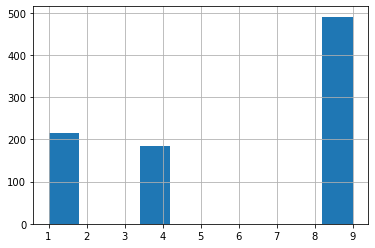

In [27]:
df["Pclass_sq"].hist()